# Week 10 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r, q):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.0001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(123, 125, 1/12, 5.2, 0.0169, 0.0067)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 120' ) 

0 0.29360594128200457 0.6082356824186919
1 0.2934908464976223 -0.0016149204584392507
The implied volatility is 29.35 % for the one-month call with strike $ 120


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-04-30')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210430P00065000,2021-03-30 14:27:04,65.0,0.03,0.00,0.03,0.000000,0.000000,2,24,0.804689,False,REGULAR,USD
1,AAPL210430P00070000,2021-04-01 16:56:26,70.0,0.03,0.00,0.04,-0.010000,-25.000000,1,39,0.742190,False,REGULAR,USD
2,AAPL210430P00075000,2021-03-31 18:59:39,75.0,0.04,0.02,0.05,0.000000,0.000000,6,291,0.695316,False,REGULAR,USD
3,AAPL210430P00080000,2021-04-01 15:26:25,80.0,0.05,0.04,0.07,-0.030000,-37.499996,10,658,0.646488,False,REGULAR,USD
4,AAPL210430P00085000,2021-04-01 15:07:45,85.0,0.08,0.07,0.09,-0.020000,-20.000004,141,647,0.591801,False,REGULAR,USD
5,AAPL210430P00090000,2021-04-01 18:02:07,90.0,0.13,0.09,0.13,-0.020000,-13.333340,18,871,0.535161,False,REGULAR,USD
6,AAPL210430P00095000,2021-04-01 19:54:52,95.0,0.17,0.16,0.18,-0.060000,-26.086956,242,2237,0.491216,False,REGULAR,USD
7,AAPL210430P00100000,2021-04-01 18:50:21,100.0,0.28,0.24,0.27,-0.040000,-12.499998,477,991,0.439947,False,REGULAR,USD
8,AAPL210430P00105000,2021-04-01 19:54:52,105.0,0.40,0.38,0.41,-0.120000,-23.076920,380,2171,0.387946,False,REGULAR,USD
9,AAPL210430P00106000,2021-04-01 19:54:52,106.0,0.44,0.42,0.45,-0.150000,-25.423727,104,500,0.377936,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.Me([123, opt.puts.strike[i], 1.69, 0.67, 28], putPrice = opt.puts.lastPrice[i])
    impliedvol [i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile')

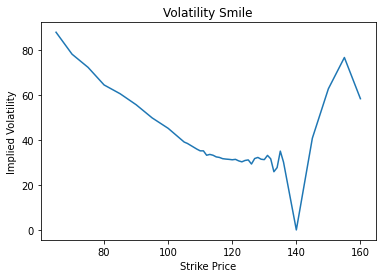

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile')

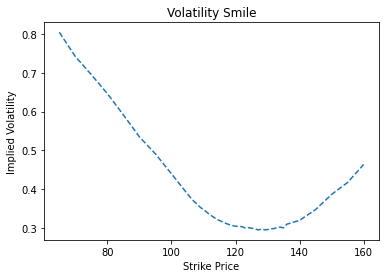

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile')

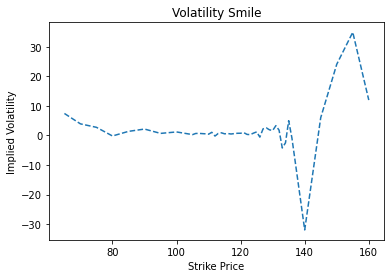

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

In [11]:
pp = mibian.Me([123, 140, 1.69, 0.67, 28], putPrice = 16.84)
pp.impliedVolatility

1e-05

## Question 6

In [12]:
import arrow
T = ['2021-04-09','2021-04-16','2021-04-23','2021-04-30','2021-05-07',
     '2021-05-21','2021-06-18','2021-07-16','2021-09-17','2021-10-15',
     '2022-01-21','2022-06-17','2022-09-16','2023-01-20','2023-03-17','2023-06-16']

In [13]:
K = [95,100,105,110,115,120,125]
now = arrow.get('2021-04-02')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]]

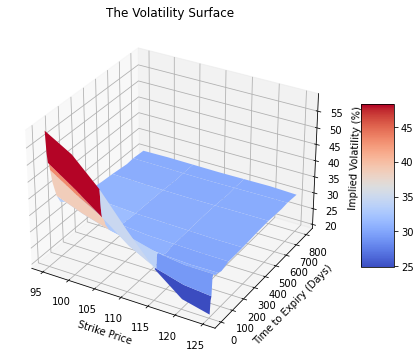

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);